#### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

#### Upload Dataset

In [3]:
df = pd.read_csv('simulatedtraffic_data2.csv')

df.head(5)

,vehicle_id,vehicle_type,speed_kmh,timestamp,location,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
0,1,Car,60,2025-04-08T00:00:00Z,LOC001,NaN,22.5,0.0,0,10,Clouds,clear sky,5545
1,2,Truck,45,2025-04-14T00:05:00Z,LOC001,NaN,22.0,0.0,0,20,Clouds,few clouds,4516
2,3,Motorbike,80,2025-04-14T00:10:00Z,LOC001,NaN,21.8,0.0,0,50,Clouds,scattered clouds,4767
3,4,Car,70,2025-04-12T00:15:00Z,LOC001,NaN,21.5,0.0,0,80,Clouds,light rain,5026
4,5,Bicycle,25,2025-04-14T00:20:00Z,LOC001,NaN,21.0,1.2,0,90,Clouds,moderate rain,4918


#### Data Preprocessing

In [4]:
#Structure the data
df.shape

(50, 13)

In [5]:
#Data types of columns
df.dtypes

vehicle_id               int64
vehicle_type            object
speed_kmh                int64
timestamp               object
location                object
holiday                 object
temp                   float64
rain_1h                float64
snow_1h                  int64
clouds_all               int64
weather_main            object
weather_description     object
traffic_volume           int64
dtype: object

In [6]:
#Select columns 
selected_columns= ['vehicle_type',	'speed_kmh',	'timestamp',	'location',
	'temp',	'rain_1h',	'clouds_all',	'weather_main',	'weather_description',	'traffic_volume'
]
df = df[selected_columns]
df.head()

,vehicle_type,speed_kmh,timestamp,location,temp,rain_1h,clouds_all,weather_main,weather_description,traffic_volume
0,Car,60,2025-04-08T00:00:00Z,LOC001,22.5,0.0,10,Clouds,clear sky,5545
1,Truck,45,2025-04-14T00:05:00Z,LOC001,22.0,0.0,20,Clouds,few clouds,4516
2,Motorbike,80,2025-04-14T00:10:00Z,LOC001,21.8,0.0,50,Clouds,scattered clouds,4767
3,Car,70,2025-04-12T00:15:00Z,LOC001,21.5,0.0,80,Clouds,light rain,5026
4,Bicycle,25,2025-04-14T00:20:00Z,LOC001,21.0,1.2,90,Clouds,moderate rain,4918


#### Clean Missing Values

In [9]:
#count missing values
df.isnull().sum()

vehicle_type           0
speed_kmh              0
timestamp              0
location               1
temp                   0
rain_1h                0
clouds_all             0
weather_main           0
weather_description    0
traffic_volume         0
dtype: int64

In [10]:
#drop only rows with NaN
df.dropna(subset=['location'], inplace=True)
print(df.isnull().sum())

vehicle_type           0
speed_kmh              0
timestamp              0
location               0
temp                   0
rain_1h                0
clouds_all             0
weather_main           0
weather_description    0
traffic_volume         0
dtype: int64


In [11]:
#view column values
df['timestamp'].unique()

array(['2025-04-08T00:00:00Z', '2025-04-14T00:05:00Z',
       '2025-04-14T00:10:00Z', '2025-04-12T00:15:00Z',
       '2025-04-14T00:20:00Z', '2025-04-11T00:25:00Z',
       '2025-04-24T00:30:00Z', '2025-04-14T00:35:00Z',
       '2025-04-14T00:40:00Z', '2025-04-14T00:45:00Z',
       '2025-04-10T00:50:00Z', '2025-04-14T00:55:00Z',
       '2025-04-14T01:00:00Z', '2025-04-17T01:05:00Z',
       '2025-04-14T01:10:00Z', '2025-04-19T01:15:00Z',
       '2025-04-14T01:20:00Z', '2025-04-14T01:25:00Z',
       '2025-04-16T01:30:00Z', '2025-04-14T01:35:00Z',
       '2025-04-14T01:40:00Z', '2025-04-17T01:50:00Z',
       '2025-04-14T01:55:00Z', '2025-04-18T02:00:00Z',
       '2025-04-14T02:05:00Z', '2025-04-14T02:10:00Z',
       '2025-04-30T02:15:00Z', '2025-04-14T02:20:00Z',
       '2025-04-14T02:25:00Z', '2025-04-14T02:30:00Z',
       '2025-04-28T02:35:00Z', '2025-04-14T02:40:00Z',
       '2025-04-14T02:45:00Z', '2025-04-14T02:50:00Z',
       '2025-04-14T02:55:00Z', '2025-04-29T03:00:00Z',
       '20

In [12]:
#Extracting time and day; also convert time into minutes
df['timestamp']=pd.to_datetime(df['timestamp'], utc=True)
df['time'] = df['timestamp'].dt.hour * 60 + df['timestamp'].dt.minute
df['day'] = df['timestamp'].dt.day
df = df.drop('timestamp', axis=1)
#chcek unique time values in minutes
df['time'].unique()

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100, 110, 115, 120, 125, 130,
       135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195,
       200, 205, 210, 215, 220, 225, 230, 235, 240, 245], dtype=int32)

In [13]:
## One-hot encoding 
df = pd.get_dummies(df, columns= ['vehicle_type', 'location', 'weather_main', 'weather_description'], drop_first=True)

In [20]:
# Normalize the 'temp', 'speed', and 'time' columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


df[['temp', 'speed_kmh', 'time']] = scaler.fit_transform(df[['temp', 'speed_kmh', 'time']])

df.head()


,speed_kmh,temp,rain_1h,clouds_all,traffic_volume,time,day,vehicle_type_Bus,vehicle_type_Car,vehicle_type_Motorbike,...,location_LOC010,location_NAN,weather_main_Clouds,weather_description_clear sky,weather_description_few clouds,weather_description_heavy intensity rain,weather_description_light rain,weather_description_moderate rain,weather_description_overcast clouds,weather_description_scattered clouds
0,0.563380,0.824561,0.0,10,5545,0.000000,8,False,True,False,...,False,False,True,True,False,False,False,False,False,False
1,0.352113,0.736842,0.0,20,4516,0.020408,14,False,False,False,...,False,False,True,False,True,False,False,False,False,False
2,0.845070,0.701754,0.0,50,4767,0.040816,14,False,False,True,...,False,False,True,False,False,False,False,False,False,True
3,0.704225,0.649123,0.0,80,5026,0.061224,12,False,True,False,...,False,False,True,False,False,False,True,False,False,False
4,0.070423,0.561404,1.2,90,4918,0.081633,14,False,False,False,...,False,False,True,False,False,False,False,True,False,False


#### Select target and feature column

In [14]:
X = df.drop('traffic_volume', axis=1)
y = df['traffic_volume']

#### Train model 

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Model evaluation

In [23]:
y_pred = model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# RSE & RAE
rse = np.sum((y_test - y_pred)**2) / np.sum((y_test - np.mean(y_test))**2)
rae = np.sum(np.abs(y_test - y_pred)) / np.sum(np.abs(y_test - np.mean(y_test)))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")
print(f"RSE: {rse:.2f}")
print(f"RAE: {rae:.2f}")

MAE: 1445.35
RMSE: 1639.94
R²: 0.37
RSE: 0.63
RAE: 0.75


#### Visualization

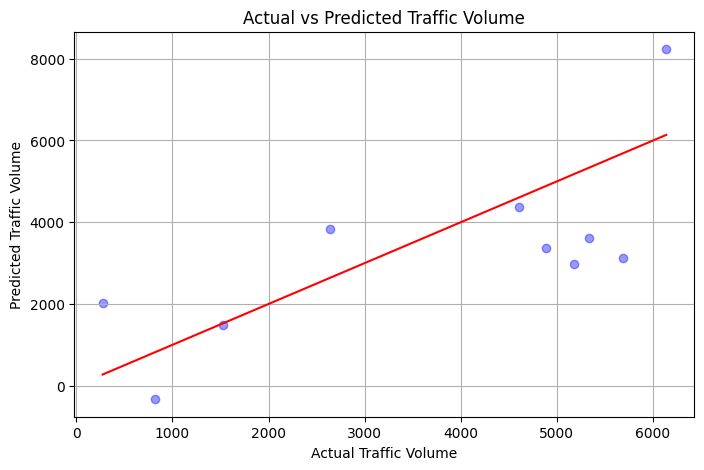

In [18]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.4, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('Actual Traffic Volume')
plt.ylabel('Predicted Traffic Volume')
plt.title('Actual vs Predicted Traffic Volume')
plt.grid(True)
plt.show()